In [1]:
import gdown
import pandas as pd
import seaborn as sns
import numpy as np
import polars as pl
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
drive_loc = 'https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ'

download_LC = 'lightcast_jobs_postings.csv'
gdown.download(drive_loc, download_LC, quiet=False)

Jobs = pl.read_csv(download_LC)

Downloading...
From (original): https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ
From (redirected): https://drive.google.com/uc?id=1V2GCHGt2dkFGqVBeoUFckU4IhUgk4ocQ&confirm=t&uuid=a7903c45-70ab-47d1-8068-1789260a248b
To: C:\Users\jtsto\OneDrive\Documents\03 BU SPRING 2025\AD 688\Project_04_working_files\lightcast_jobs_postings.csv
100%|██████████| 717M/717M [01:11<00:00, 9.98MB/s] 


In [45]:
Jobs.shape

(72498, 131)

In [46]:
print(Jobs.columns)
Jobs.select(Jobs.columns).head(3)

['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 'NAICS5_NAME', 'NAICS6', 'NAIC

ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,ACTIVE_URLS,ACTIVE_SOURCES_INFO,TITLE_RAW,BODY,MODELED_EXPIRED,MODELED_DURATION,COMPANY,COMPANY_NAME,COMPANY_RAW,COMPANY_IS_STAFFING,EDUCATION_LEVELS,EDUCATION_LEVELS_NAME,MIN_EDULEVELS,MIN_EDULEVELS_NAME,MAX_EDULEVELS,MAX_EDULEVELS_NAME,EMPLOYMENT_TYPE,EMPLOYMENT_TYPE_NAME,MIN_YEARS_EXPERIENCE,MAX_YEARS_EXPERIENCE,IS_INTERNSHIP,SALARY,REMOTE_TYPE,REMOTE_TYPE_NAME,ORIGINAL_PAY_PERIOD,SALARY_TO,SALARY_FROM,…,SOC_2021_5_NAME,LOT_CAREER_AREA,LOT_CAREER_AREA_NAME,LOT_OCCUPATION,LOT_OCCUPATION_NAME,LOT_SPECIALIZED_OCCUPATION,LOT_SPECIALIZED_OCCUPATION_NAME,LOT_OCCUPATION_GROUP,LOT_OCCUPATION_GROUP_NAME,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_SPECIALIZED_OCCUPATION_NAME,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_NAME,LOT_V6_OCCUPATION_GROUP,LOT_V6_OCCUPATION_GROUP_NAME,LOT_V6_CAREER_AREA,LOT_V6_CAREER_AREA_NAME,SOC_2,SOC_2_NAME,SOC_3,SOC_3_NAME,SOC_4,SOC_4_NAME,SOC_5,SOC_5_NAME,LIGHTCAST_SECTORS,LIGHTCAST_SECTORS_NAME,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
str,str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,i64,i64,str,str,bool,str,str,i64,str,i64,str,i64,str,i64,i64,bool,i64,i64,str,str,i64,i64,…,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,i64,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str,i64,str,i64,str,i64,str
"""1f57d95acf4dc67ed2819eb12f049f…","""9/6/2024""","""2024-09-06 20:32:57.352 Z""",0,"""6/2/2024""","""6/8/2024""",6,"""[ ""Company"" ]""","""[ ""brassring.com"" ]""","""[ ""https://sjobs.brassring.c…","""[]""",null,"""Enterprise Analyst (II-III)""","""31-May-2024 Enterprise Analys…","""6/8/2024""",6,894731,"""Murphy USA""","""Murphy USA""",false,"""[ 2 ]""","""[ ""Bachelor's degree"" ]""",2,"""Bachelor's degree""",null,null,1,"""Full-time (> 32 hours)""",2,2,false,null,0,"""[None]""",null,null,null,…,"""Data Scientists""",23,"""Information Technology and Com…",231010,"""Business Intelligence Analyst""",23101011,"""General ERP Analyst / Consulta…",2310,"""Business Intelligence""",23101011,"""General ERP Analyst / Consulta…",231010,"""Business Intelligence Analyst""",2310,"""Business Intelligence""",23,"""Information Technology and Com…","""15-0000""","""Computer and Mathematical Occu…","""15-2000""","""Mathematical Science Occupatio…","""15-2050""","""Data Scientists""","""15-2051""","""Data Scientists""","""[ 7 ]""","""[ ""Artificial Intelligence"" …",44,"""Retail Trade""",441,"""Motor Vehicle and Parts Dealer…",4413,"""Automotive Parts, Accessories,…",44133,"""Automotive Parts and Accessori…",441330,"""Automotive Parts and Accessori…"
"""0cb072af26757b6c4ea9464472a50a…","""8/2/2024""","""2024-08-02 17:08:58.838 Z""",0,"""6/2/2024""","""8/1/2024""",null,"""[ ""Job Board"" ]""","""[ ""maine.gov"" ]""","""[ ""https://joblink.maine.gov…","""[]""",null,"""Oracle Consultant - Reports (3…","""Oracle Consultant - Reports (3…","""8/1/2024""",null,133098,"""Smx Corporation Limited""","""SMX""",true,"""[ 99 ]""","""[ ""No Education Listed"" ]""",99,"""No Education Listed""",null,null,1,"""Full-time (> 32 hours)""",3,3,false,null,1,"""Remote""",null,null,null,…,"""Data Scientists""",23,"""Information Technology and Com…",231010,"""Business Intelligence Analyst""",23101012,"""Oracle Consultant / Analyst""",2310,"""Business Intelligence""",23101012,"""Oracle Consultant / Analyst""",231010,"""Business Intelligence Analyst""",2310,"""Business Intelligence""",23,"""Information Technology and Com…","""15-0000""","""Computer and Mathematical Occu…","""15-2000""","""Mathematical Science Occupatio…","""15-2050""","""Data Scientists""","""15-2051""","""Data Scientists""",null,null,56,"""Administrative and Support and…",561,"""Administrative and Support Ser…",5613,"""Employment Services""",56132,"""Temporary Help Services""",561320,"""Temporary Help Services"""
"""85318b12b3331fa490d32ad014379d…","""9

*__clear NaN values for SALARY on the onset__*

In [47]:
Jobs_lgt_filter = Jobs.filter(pl.col("SALARY").is_not_null())

Jobs_lgt_filter.shape

(30808, 131)

*__Descriptive Statistics for SALARY__*

In [48]:
salary_stats = Jobs_lgt_filter.select([
    pl.col("SALARY").mean().alias("mean_salary"),
    pl.col("SALARY").median().alias("median_salary"),
    pl.col("SALARY").min().alias("min_salary"),
    pl.col("SALARY").max().alias("max_salary"),
    pl.col("SALARY").std().alias("std_salary"),
])

print(salary_stats)

shape: (1, 5)
┌───────────────┬───────────────┬────────────┬────────────┬──────────────┐
│ mean_salary   ┆ median_salary ┆ min_salary ┆ max_salary ┆ std_salary   │
│ ---           ┆ ---           ┆ ---        ┆ ---        ┆ ---          │
│ f64           ┆ f64           ┆ i64        ┆ i64        ┆ f64          │
╞═══════════════╪═══════════════╪════════════╪════════════╪══════════════╡
│ 117953.755031 ┆ 116300.0      ┆ 15860      ┆ 500000     ┆ 45133.878359 │
└───────────────┴───────────────┴────────────┴────────────┴──────────────┘


*__Box Plot for SALARY__ (visually looking for potential outliers)*

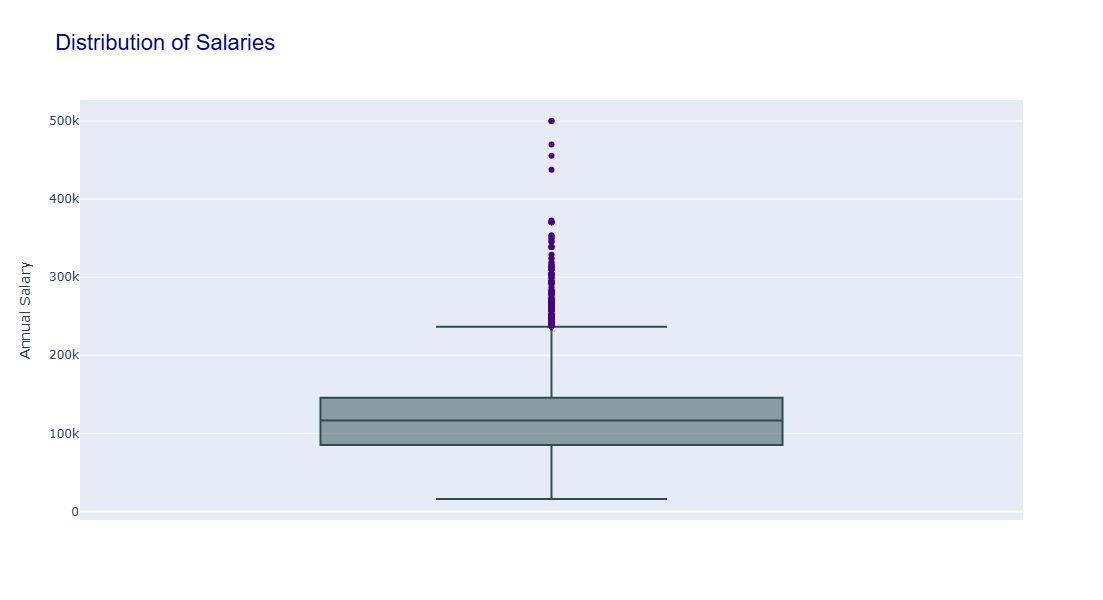

In [49]:
df_pd = Jobs_lgt_filter.select("SALARY").to_pandas()

fig = px.box(df_pd, y="SALARY", title="Distribution of Salaries")
fig.update_traces(marker_color="indigo", line_color="darkslategray")
fig.update_layout(
    yaxis_title="Annual Salary",
    height=600,
    title_font=dict(size=22, family="Arial", color="darkblue"),
)
fig.show()

*__Filter values above \\$230,000 (the upper fence equal to \\$236,500) and below \\$50,000__*

In [50]:
Jobs_lgt_filter = Jobs_lgt_filter.filter(
    (pl.col("SALARY") >= 50_000) & (pl.col("SALARY") <= 230_000)
)

In [51]:
Jobs_lgt_filter.shape

(28971, 131)

*__Investigating MIN_YEARS_EXPERIENCE__*

In [52]:
min_exp_nan = Jobs_lgt_filter.select(pl.col("MIN_YEARS_EXPERIENCE").is_null().sum()).item()
min_exp_total = Jobs_lgt_filter.height
percent_missing = (min_exp_nan / min_exp_total) * 100
print(f"MIN_YEARS_EXPERIENCE NaN's: {min_exp_nan} ({percent_missing:.2f}%)")

MIN_YEARS_EXPERIENCE NaN's: 6263 (21.62%)


*__Impute NaN values in the MIN_YEARS_EXPERIENCE column with the median__*

In [53]:
median_experience = Jobs_lgt_filter.select(
    pl.col("MIN_YEARS_EXPERIENCE").median()
).item()

print("Median MIN_YEARS_EXPERIENCE:", median_experience)

Median MIN_YEARS_EXPERIENCE: 5.0


In [54]:
Jobs_lgt_filter = Jobs_lgt_filter.with_columns([
    pl.col("MIN_YEARS_EXPERIENCE").fill_null(median_experience)
])

print(
    Jobs_lgt_filter.select(pl.col("MIN_YEARS_EXPERIENCE").is_null().sum())
)

shape: (1, 1)
┌──────────────────────┐
│ MIN_YEARS_EXPERIENCE │
│ ---                  │
│ u32                  │
╞══════════════════════╡
│ 0                    │
└──────────────────────┘


*__Understanding the ONET category__*

In [55]:
columns_to_check = ['ONET', 'ONET_NAME', 'ONET_2019', 'ONET_2019_NAME']

for col in columns_to_check:
    print(f"\nUnique value counts for '{col}':")
    print(Jobs_lgt_filter[col].value_counts())


Unique value counts for 'ONET':
shape: (1, 2)
┌────────────┬───────┐
│ ONET       ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ 15-2051.01 ┆ 28971 │
└────────────┴───────┘

Unique value counts for 'ONET_NAME':
shape: (1, 2)
┌────────────────────────────────┬───────┐
│ ONET_NAME                      ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Business Intelligence Analysts ┆ 28971 │
└────────────────────────────────┴───────┘

Unique value counts for 'ONET_2019':
shape: (1, 2)
┌────────────┬───────┐
│ ONET_2019  ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ 15-2051.01 ┆ 28971 │
└────────────┴───────┘

Unique value counts for 'ONET_2019_NAME':
shape: (1, 2)
┌────────────────────────────────┬───────┐
│ ONET_2019_NAME                 ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32  

In [56]:
bi_analysts = Jobs_lgt_filter.filter(pl.col('ONET_2019_NAME') == 'Business Intelligence Analysts')

print(bi_analysts.select(pl.col('TITLE_CLEAN').unique()))

shape: (10_107, 1)
┌─────────────────────────────────┐
│ TITLE_CLEAN                     │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ senior data analyst mayors off… │
│ data analyst ii remote us       │
│ sr specialist sap cloud infras… │
│ usa principal data analyst      │
│ servicedesk support specialist… │
│ …                               │
│ aws investments sales operatio… │
│ oracle e business techno funct… │
│ data analyst non remote         │
│ erp business process analyst i… │
│ data senior analyst             │
└─────────────────────────────────┘


In [57]:
print(
    bi_analysts.group_by('TITLE_CLEAN')
           .len()
           .sort('len', descending=True)
           .select(['TITLE_CLEAN', 'len'])
           .limit(10)
)


shape: (10, 2)
┌─────────────────────────────────┬──────┐
│ TITLE_CLEAN                     ┆ len  │
│ ---                             ┆ ---  │
│ str                             ┆ u32  │
╞═════════════════════════════════╪══════╡
│ data analyst                    ┆ 2077 │
│ business intelligence analyst   ┆ 330  │
│ senior data analyst             ┆ 307  │
│ enterprise architect            ┆ 294  │
│ oracle hcm cloud implementatio… ┆ 134  │
│ data and reporting professiona… ┆ 120  │
│ lead data analyst               ┆ 113  │
│ solution architect              ┆ 108  │
│ sr data analyst                 ┆ 105  │
│ data analytics engineer         ┆ 98   │
└─────────────────────────────────┴──────┘


In [58]:
print(
    bi_analysts.select(pl.col('BODY').str.slice(0, 100)).head(10)
)

shape: (10, 1)
┌─────────────────────────────────┐
│ BODY                            │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ Comisiones de $1000 - $3000 po… │
│ About Lumen                     │
│                                 │
│ Lumen connects th…              │
│ Sr. Marketing Analyst           │
│ United S…                       │
│ Data Analyst In Ridgecrest At … │
│ Power, Utilities & Renewables … │
│ Sr. Enterprise Data Architectu… │
│ Job Description: We Are: Accen… │
│ Principal growth data analyst … │
│ About Lumen                     │
│                                 │
│ Lumen connects th…              │
│ Senior Enterprise Architect (r… │
└─────────────────────────────────┘


*__Plot of top 10 Job Titles (frequency) within the ONET category__*

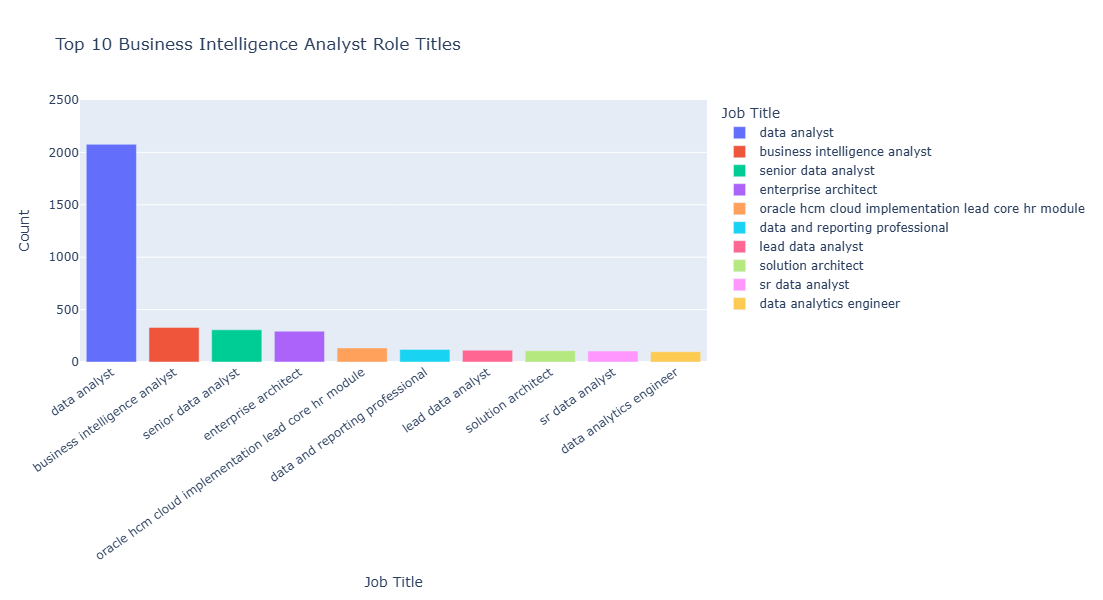

In [59]:
title_counts = (
    bi_analysts.group_by("TITLE_CLEAN")
               .len()
               .sort("len", descending=True)
               .limit(10)
               .to_pandas()
)

fig = px.bar(
    title_counts,
    x="TITLE_CLEAN",
    y="len",
    title="Top 10 Business Intelligence Analyst Role Titles",
    labels={"TITLE_CLEAN": "Job Title", "len": "Count"},
    color="TITLE_CLEAN" 
)

fig.update_layout(
    xaxis_tickangle=-35,
    height=600,               
    yaxis=dict(range=[0, 2500]) 
)

fig.show()

*__Understanding Education Levels__*

In [60]:
Jobs_lgt_filter.select([
    pl.col("MIN_EDULEVELS"),
    pl.col("MIN_EDULEVELS_NAME")
]).unique().sort("MIN_EDULEVELS")

MIN_EDULEVELS,MIN_EDULEVELS_NAME
i64,str
0,"""High school or GED"""
1,"""Associate degree"""
2,"""Bachelor's degree"""
3,"""Master's degree"""
4,"""Ph.D. or professional degree"""
99,"""No Education Listed"""


*NOTE: quick check on NaN's*

In [61]:
Jobs_lgt_filter.select([
    pl.col("MIN_EDULEVELS").is_null().sum().alias("Nulls_MIN_EDULEVELS"),
    pl.col("MIN_EDULEVELS_NAME").is_null().sum().alias("Nulls_MIN_EDULEVELS_NAME")
])

Nulls_MIN_EDULEVELS,Nulls_MIN_EDULEVELS_NAME
u32,u32
0,0


In [62]:
Jobs_lgt_filter.group_by("MIN_EDULEVELS_NAME").len().sort("len", descending=True)

MIN_EDULEVELS_NAME,len
str,u32
"""Bachelor's degree""",18758
"""No Education Listed""",6255
"""Associate degree""",1752
"""High school or GED""",1351
"""Master's degree""",820
"""Ph.D. or professional degree""",35


*__Remove "No Education Listed" (99)__*

In [63]:
Jobs_lgt_filter = Jobs_lgt_filter.filter(
    pl.col("MIN_EDULEVELS") != 99
)

In [64]:
Jobs_lgt_filter.shape

(22716, 131)

*__looking for correlations__*

In [65]:
top_titles = (
    Jobs_lgt_filter.group_by("TITLE_CLEAN")
    .len()
    .sort("len", descending=True)
    .limit(10)
    .select("TITLE_CLEAN")
    .to_series()
    .to_list()
)

top_jobs = Jobs_lgt_filter.filter(
    pl.col("TITLE_CLEAN").is_in(top_titles)
)

In [66]:
df_top = top_jobs.select([
    "SALARY",
    "MIN_YEARS_EXPERIENCE",
    "MIN_EDULEVELS",
    "TITLE_CLEAN"
]).to_pandas()

In [67]:
df_encoded = pd.get_dummies(df_top, columns=["TITLE_CLEAN"])

In [68]:
corr_matrix = df_encoded.corr()

print(corr_matrix["SALARY"].sort_values(ascending=False))

SALARY                                                             1.000000
MIN_YEARS_EXPERIENCE                                               0.475018
TITLE_CLEAN_enterprise architect                                   0.428721
TITLE_CLEAN_oracle hcm cloud manager                               0.389565
TITLE_CLEAN_oracle hcm cloud implementation lead core hr module    0.298012
TITLE_CLEAN_data analytics engineer                                0.100518
MIN_EDULEVELS                                                      0.092600
TITLE_CLEAN_senior data analyst                                    0.087123
TITLE_CLEAN_sr analyst data analytics                              0.046406
TITLE_CLEAN_lead data analyst                                      0.042732
TITLE_CLEAN_business intelligence analyst                         -0.115791
TITLE_CLEAN_data and reporting professional                       -0.174890
TITLE_CLEAN_data analyst                                          -0.459022
Name: SALARY

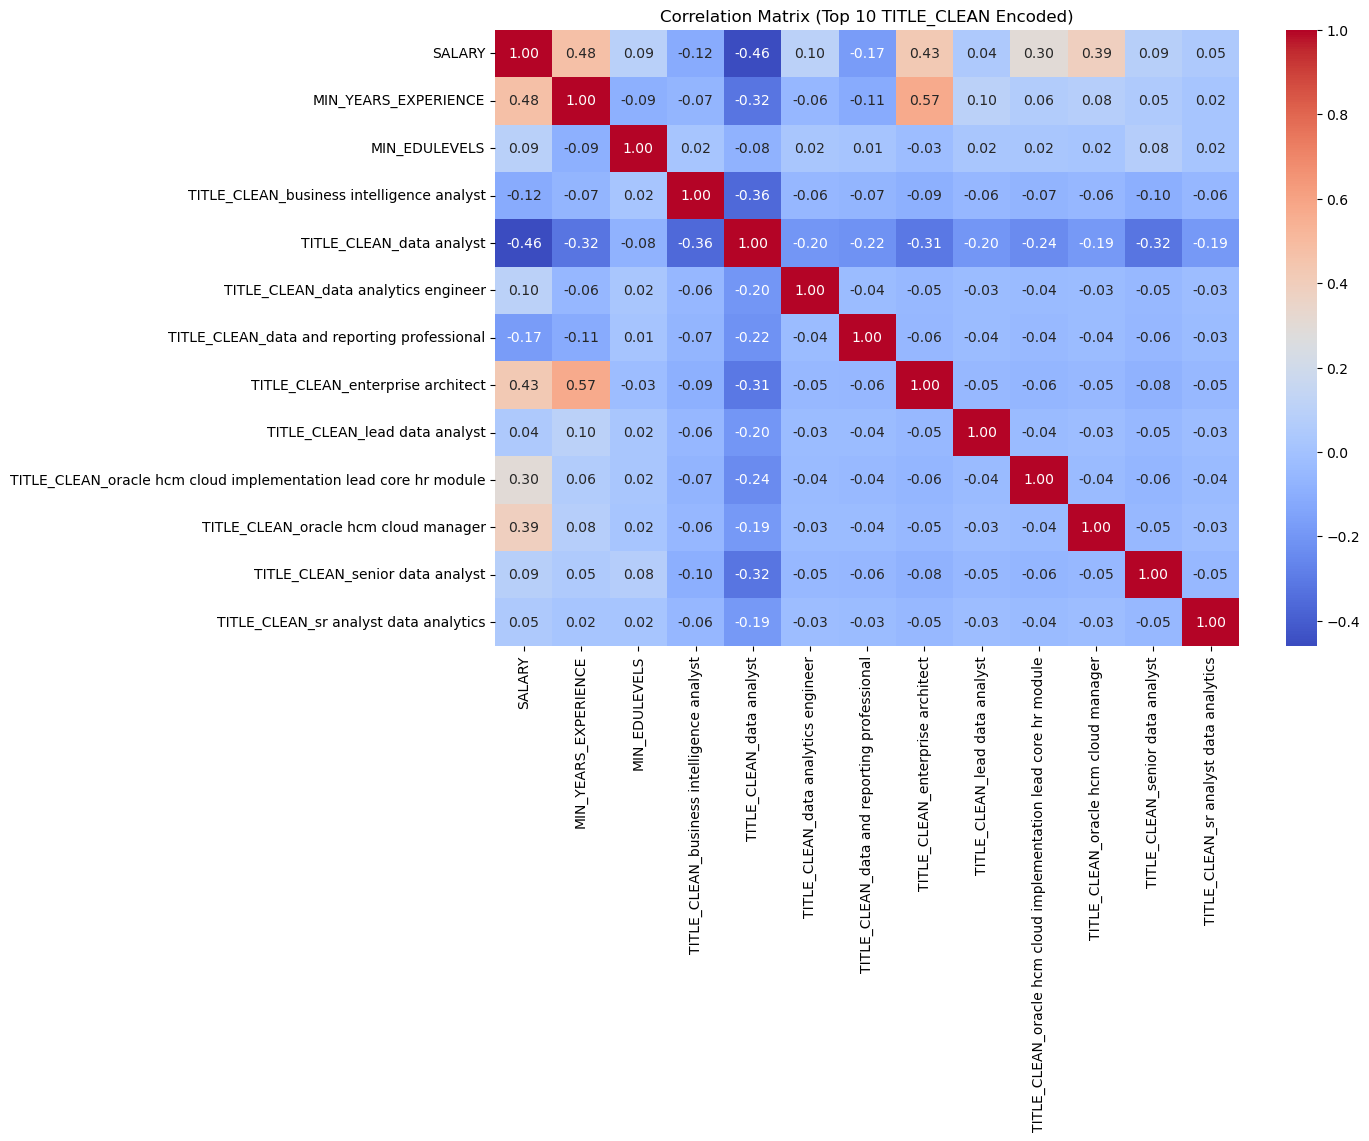

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix (Top 10 TITLE_CLEAN Encoded)")
plt.show()

*__The Random Forest Model__*

In [70]:
feature_cols = [
    'MIN_YEARS_EXPERIENCE',
    'MIN_EDULEVELS',
    'TITLE_CLEAN_enterprise architect',
    'TITLE_CLEAN_oracle hcm cloud manager',
    'TITLE_CLEAN_oracle hcm cloud implementation lead core hr module',
    'TITLE_CLEAN_data analytics engineer',
    'TITLE_CLEAN_senior data analyst',
    'TITLE_CLEAN_sr analyst data analytics',
    'TITLE_CLEAN_lead data analyst',
    'TITLE_CLEAN_business intelligence analyst',
    'TITLE_CLEAN_data and reporting professional',
    'TITLE_CLEAN_data analyst'
]

X = df_encoded[feature_cols]
y = df_encoded['SALARY']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [72]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

*__Feature Importance__*

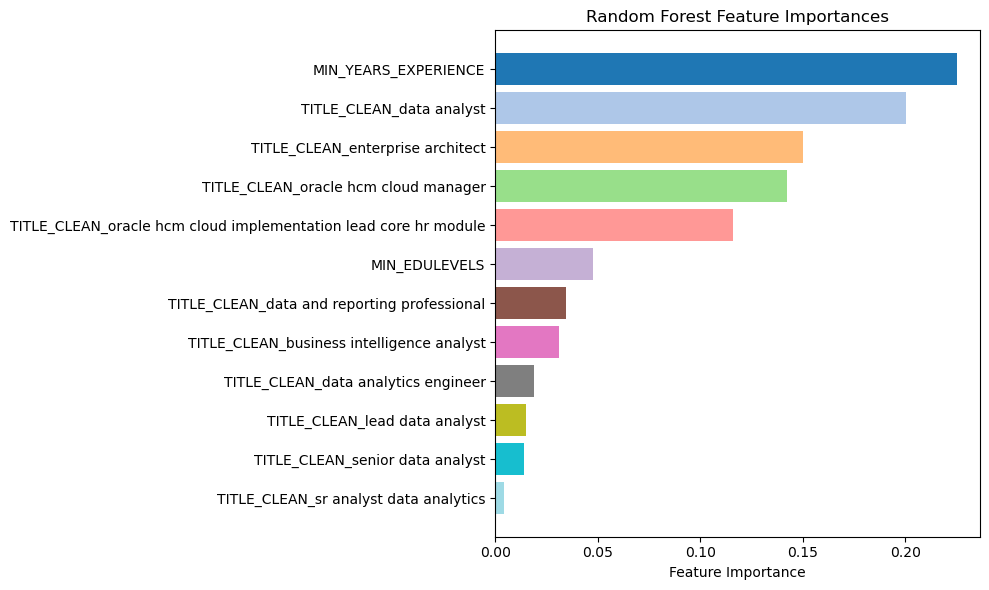

In [73]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    y=importance_df["Feature"],
    width=importance_df["Importance"],
    color=plt.cm.tab20(np.linspace(0, 1, len(importance_df))) 
)

plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

*__The Model's Performance__*

In [74]:
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("=== Random Forest Regression Performance ===")
print(f"R² Score:               {r2:.4f}")
print(f"Mean Absolute Error:    {mae:,.2f}")
print(f"Mean Squared Error:     {mse:,.2f}")
print(f"Root Mean Squared Error:{rmse:,.2f}")

=== Random Forest Regression Performance ===
R² Score:               0.5897
Mean Absolute Error:    16,158.18
Mean Squared Error:     565,614,068.84
Root Mean Squared Error:23,782.64


*__Residual Plot__*

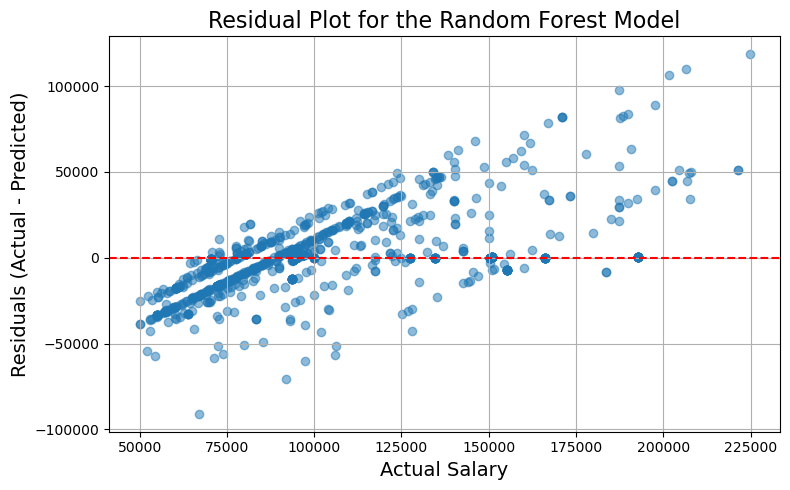

In [75]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Salary", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
plt.title("Residual Plot for the Random Forest Model", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

*__Bin and create a confusion matrix__*

In [76]:
def categorize_salary(salary):
    if salary < 60_000:
        return 'Low'
    elif salary < 120_000:
        return 'Medium'
    else:
        return 'High'

y_test_cat = y_test.apply(categorize_salary)
y_pred_cat = pd.Series(y_pred).apply(categorize_salary)

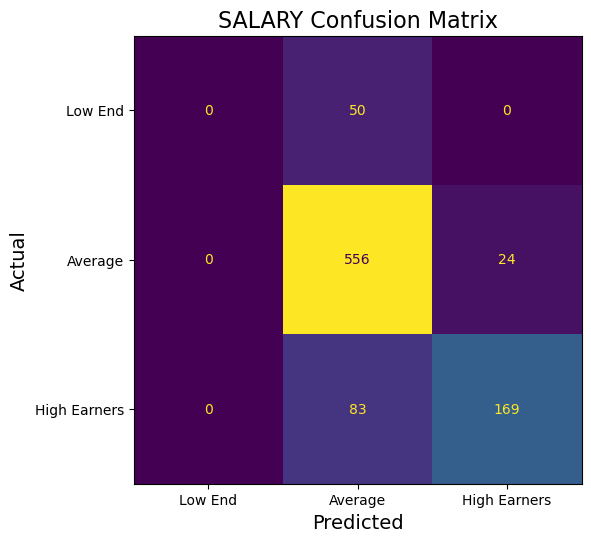

In [77]:
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Low', 'Medium', 'High'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low End', 'Average', 'High Earners'])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='viridis', colorbar=False)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)
ax.set_title('SALARY Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

*__Salary Predictions__*

In [78]:
feature_cols = [
    'MIN_YEARS_EXPERIENCE',
    'MIN_EDULEVELS',
    'TITLE_CLEAN_enterprise architect',
    'TITLE_CLEAN_oracle hcm cloud manager',
    'TITLE_CLEAN_oracle hcm cloud implementation lead core hr module',
    'TITLE_CLEAN_data analytics engineer',
    'TITLE_CLEAN_senior data analyst',
    'TITLE_CLEAN_sr analyst data analytics',
    'TITLE_CLEAN_lead data analyst',
    'TITLE_CLEAN_business intelligence analyst',
    'TITLE_CLEAN_data and reporting professional',
    'TITLE_CLEAN_data analyst'
]

In [79]:
input_data_01 = pd.DataFrame([{
'MIN_YEARS_EXPERIENCE': 1,  # 1 year of experience
    'MIN_EDULEVELS': 2,  # Bachelor's degree
    'TITLE_CLEAN_enterprise architect': 0,
    'TITLE_CLEAN_oracle hcm cloud manager': 0,
    'TITLE_CLEAN_oracle hcm cloud implementation lead core hr module': 0,
    'TITLE_CLEAN_data analytics engineer': 0,
    'TITLE_CLEAN_senior data analyst': 0,
    'TITLE_CLEAN_sr analyst data analytics': 0,
    'TITLE_CLEAN_lead data analyst': 0,
    'TITLE_CLEAN_business intelligence analyst': 0,
    'TITLE_CLEAN_data and reporting professional': 0,
    'TITLE_CLEAN_data analyst': 1  # Data Analyst position
}])[feature_cols] 

In [80]:
predicted_salary_01 = rf.predict(input_data_01)[0]
print(f"Predicted Salary 01: ${predicted_salary_01:,.2f}")

Predicted Salary 01: $75,042.44


In [81]:
input_data_02 = pd.DataFrame([{
    'MIN_YEARS_EXPERIENCE': 1,  # 1 year of experience
    'MIN_EDULEVELS': 3,  # Master's degree
    'TITLE_CLEAN_enterprise architect': 0,
    'TITLE_CLEAN_oracle hcm cloud manager': 0,
    'TITLE_CLEAN_oracle hcm cloud implementation lead core hr module': 0,
    'TITLE_CLEAN_data analytics engineer': 0,
    'TITLE_CLEAN_senior data analyst': 0,
    'TITLE_CLEAN_sr analyst data analytics': 0,
    'TITLE_CLEAN_lead data analyst': 0,
    'TITLE_CLEAN_business intelligence analyst': 0,
    'TITLE_CLEAN_data and reporting professional': 0,
    'TITLE_CLEAN_data analyst': 1  # Data Analyst position
}])[feature_cols] 

In [82]:
predicted_salary_02 = rf.predict(input_data_02)[0]
print(f"Predicted Salary 02: ${predicted_salary_02:,.2f}")

Predicted Salary 02: $130,853.39


In [83]:
input_data_03 = pd.DataFrame([{
    'MIN_YEARS_EXPERIENCE': 7,  # 7 years of experience
    'MIN_EDULEVELS': 3,  # Master's degree
    'TITLE_CLEAN_enterprise architect': 0,
    'TITLE_CLEAN_oracle hcm cloud manager': 0,
    'TITLE_CLEAN_oracle hcm cloud implementation lead core hr module': 0,
    'TITLE_CLEAN_data analytics engineer': 0,
    'TITLE_CLEAN_senior data analyst': 1, # Senior Data Analyst position
    'TITLE_CLEAN_sr analyst data analytics': 0,
    'TITLE_CLEAN_lead data analyst': 0, 
    'TITLE_CLEAN_business intelligence analyst': 0,
    'TITLE_CLEAN_data and reporting professional': 0,
    'TITLE_CLEAN_data analyst': 0 
}])[feature_cols] 

In [84]:
predicted_salary_03 = rf.predict(input_data_03)[0]
print(f"Predicted Salary 03: ${predicted_salary_03:,.2f}")

Predicted Salary 03: $153,082.86


In [85]:
input_data_04 = pd.DataFrame([{
    'MIN_YEARS_EXPERIENCE': 7,  # 7 years of experience
    'MIN_EDULEVELS': 3,  # Master's degree
    'TITLE_CLEAN_enterprise architect': 1, # Enterprise Architect position
    'TITLE_CLEAN_oracle hcm cloud manager': 0,
    'TITLE_CLEAN_oracle hcm cloud implementation lead core hr module': 0,
    'TITLE_CLEAN_data analytics engineer': 0,
    'TITLE_CLEAN_senior data analyst': 0,
    'TITLE_CLEAN_sr analyst data analytics': 0,
    'TITLE_CLEAN_lead data analyst': 0,
    'TITLE_CLEAN_business intelligence analyst': 0,
    'TITLE_CLEAN_data and reporting professional': 0,
    'TITLE_CLEAN_data analyst': 0
}])[feature_cols] 

In [86]:
predicted_salary_04 = rf.predict(input_data_04)[0]
print(f"Predicted Salary 04: ${predicted_salary_04:,.2f}")

Predicted Salary 04: $162,052.77
